In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../data/raw/job_offer.tsv", delimiter='\t', encoding="utf-8")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,35,36,39,40,41,42,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data = raw_data[["CONTRACT_TYPE_NAME", "QUALIFICATION_NAME"]].copy()

In [15]:
data.head()

,CONTRACT_TYPE_NAME,QUALIFICATION_NAME
0,Contrat travail saisonnier,Employé non qualifié
1,Contrat à durée déterminée,Employé qualifié
2,Travail intérimaire,"Ouvrier qualifié (P1,P2)"
3,Profession commerciale,Cadre
4,Travail intérimaire,"Ouvrier qualifié (P1,P2)"


In [16]:
res = []
for i, row in data.iterrows():
    res.append(row["CONTRACT_TYPE_NAME"] + " - " + row["QUALIFICATION_NAME"])

In [17]:
data["BOTH"] = res
data.head()

,CONTRACT_TYPE_NAME,QUALIFICATION_NAME,BOTH
0,Contrat travail saisonnier,Employé non qualifié,Contrat travail saisonnier - Employé non qualifié
1,Contrat à durée déterminée,Employé qualifié,Contrat à durée déterminée - Employé qualifié
2,Travail intérimaire,"Ouvrier qualifié (P1,P2)","Travail intérimaire - Ouvrier qualifié (P1,P2)"
3,Profession commerciale,Cadre,Profession commerciale - Cadre
4,Travail intérimaire,"Ouvrier qualifié (P1,P2)","Travail intérimaire - Ouvrier qualifié (P1,P2)"


In [18]:
type_code = dict()
type_code2 = dict()
for x in data["BOTH"].unique():
    count = data["BOTH"][data["BOTH"] == x].count()
    if count > 4000:
        type_code2[x] = [count]
    type_code[x] = [count]
type_code = pd.DataFrame(type_code)
type_code2 = pd.DataFrame(type_code2)

In [19]:
#type_code = type_code[type_code > 50]
type_code2

,Contrat travail saisonnier - Employé qualifié,Contrat à durée déterminée - Employé non qualifié,Contrat à durée déterminée - Employé qualifié,"Contrat à durée déterminée - Ouvrier qualifié (P1,P2)",Contrat à durée déterminée - Technicien,Contrat à durée indéterminée - Agent de maîtrise,Contrat à durée indéterminée - Cadre,Contrat à durée indéterminée - Employé non qualifié,Contrat à durée indéterminée - Employé qualifié,"Contrat à durée indéterminée - Ouvrier qualifié (P1,P2)",Contrat à durée indéterminée - Technicien,Travail intérimaire - Employé non qualifié,Travail intérimaire - Employé qualifié,"Travail intérimaire - Ouvrier qualifié (P1,P2)",Travail intérimaire - Ouvrier spécialisé
0,6168,15311,29486,4933,5383,8788,8453,10232,39513,6870,12095,4969,8362,8105,5806


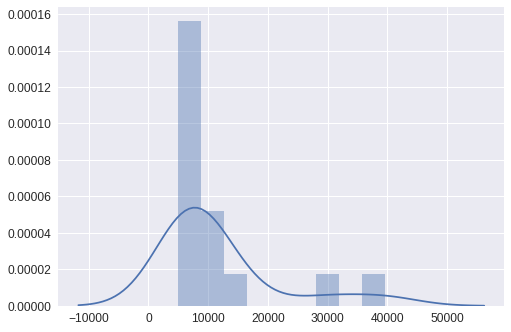

In [20]:
sns.distplot(type_code2)
plt.show()

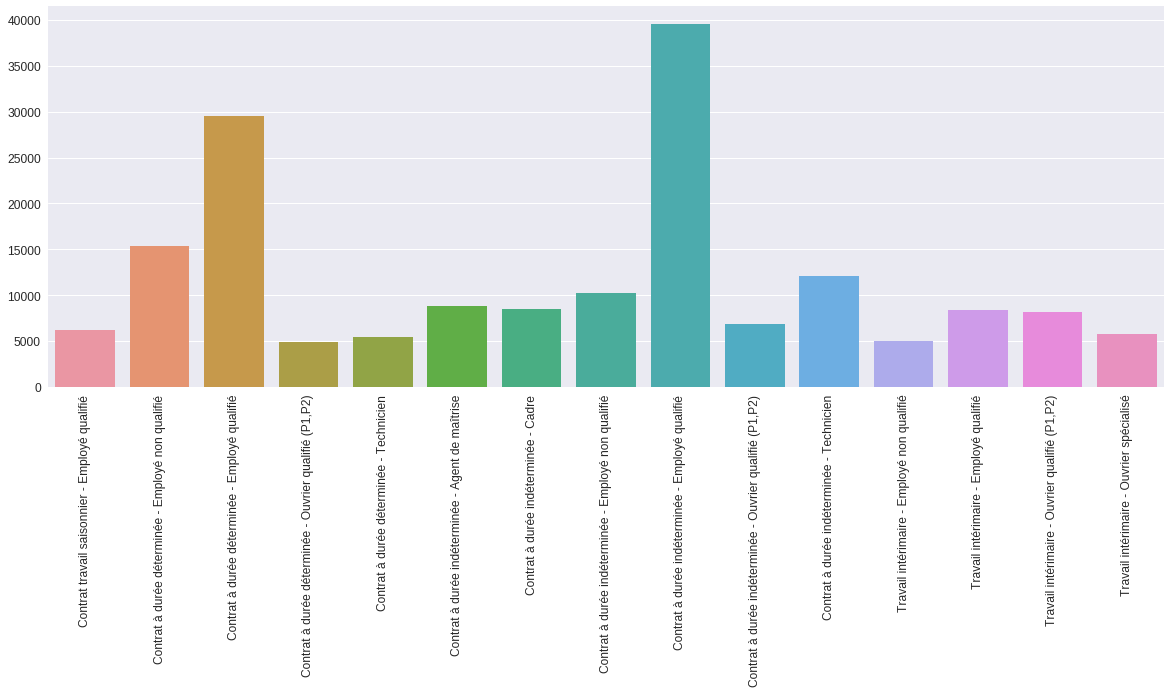

In [21]:
plt.figure(figsize=(20, 7))
g = sns.barplot(data=type_code2)
g.set_xticklabels(rotation=90, labels=type_code2.columns.values)
plt.show()

In [22]:
res = pd.DataFrame()
count = []
for x in type_code.columns.values:
    res = pd.concat([res, data[data["BOTH"] == x]])
    res = res.drop_duplicates(["BOTH"])
    count.append(int(type_code[x][0]))
res["count"] = count
res.head()

,CONTRACT_TYPE_NAME,QUALIFICATION_NAME,BOTH,count
8803,CDD sénior,Agent de maîtrise,CDD sénior - Agent de maîtrise,4
170,CDD sénior,Employé non qualifié,CDD sénior - Employé non qualifié,7
5319,CDD sénior,Employé qualifié,CDD sénior - Employé qualifié,44
70954,CDD sénior,"Ouvrier qualifié (P1,P2)","CDD sénior - Ouvrier qualifié (P1,P2)",4
12305,CDD sénior,Ouvrier spécialisé,CDD sénior - Ouvrier spécialisé,1


In [23]:
tmp_res = dict()
for x in range(len(res["CONTRACT_TYPE_NAME"].values)):
    k = res["QUALIFICATION_NAME"].values[x]
    if res["CONTRACT_TYPE_NAME"].values[x] in tmp_res:
        if k not in tmp_res[res["CONTRACT_TYPE_NAME"].values[x]]:
            tmp_res[res["CONTRACT_TYPE_NAME"].values[x]][k] = res["count"].values[x]
        else:
            tmp_res[res["CONTRACT_TYPE_NAME"].values[x]][k] + res["count"].values[x]
    else:
        tmp_res[res["CONTRACT_TYPE_NAME"].values[x]] = {k: res["count"].values[x]}
tmp_res = pd.DataFrame(tmp_res)
tmp_res

,CDD sénior,Contrat d'usage,Contrat durée déterminée insertion,Contrat travail intermittent,Contrat travail saisonnier,Contrat travail temporaire insertion,Contrat à durée déterminée,Contrat à durée indéterminée,Franchise,Profession commerciale,Profession libérale,Reprise d'entreprise,Travail intérimaire
Agent de maîtrise,4.0,NaN,NaN,3,62,NaN,2069,8788,73.0,185,75,11.0,784
Cadre,NaN,NaN,NaN,1,13,NaN,1675,8453,208.0,152,104,5.0,359
Employé non qualifié,7.0,45.0,264.0,66,2848,89.0,15311,10232,56.0,1022,90,3.0,4969
Employé qualifié,44.0,3.0,52.0,184,6168,24.0,29486,39513,155.0,1233,404,61.0,8362
Manoeuvre,NaN,21.0,173.0,7,382,45.0,1965,973,101.0,88,10,NaN,1858
"Ouvrier qualifié (P1,P2)",4.0,5.0,33.0,2,616,42.0,4933,6870,NaN,14,3,6.0,8105
"Ouvrier qualifié (P3,P4,OHQ)",NaN,1.0,8.0,1,119,3.0,1310,2970,NaN,3,2,34.0,3170
Ouvrier spécialisé,1.0,4.0,61.0,6,368,42.0,2907,3579,4.0,6,23,1.0,5806
Technicien,20.0,NaN,3.0,38,69,1.0,5383,12095,251.0,285,168,3.0,2865


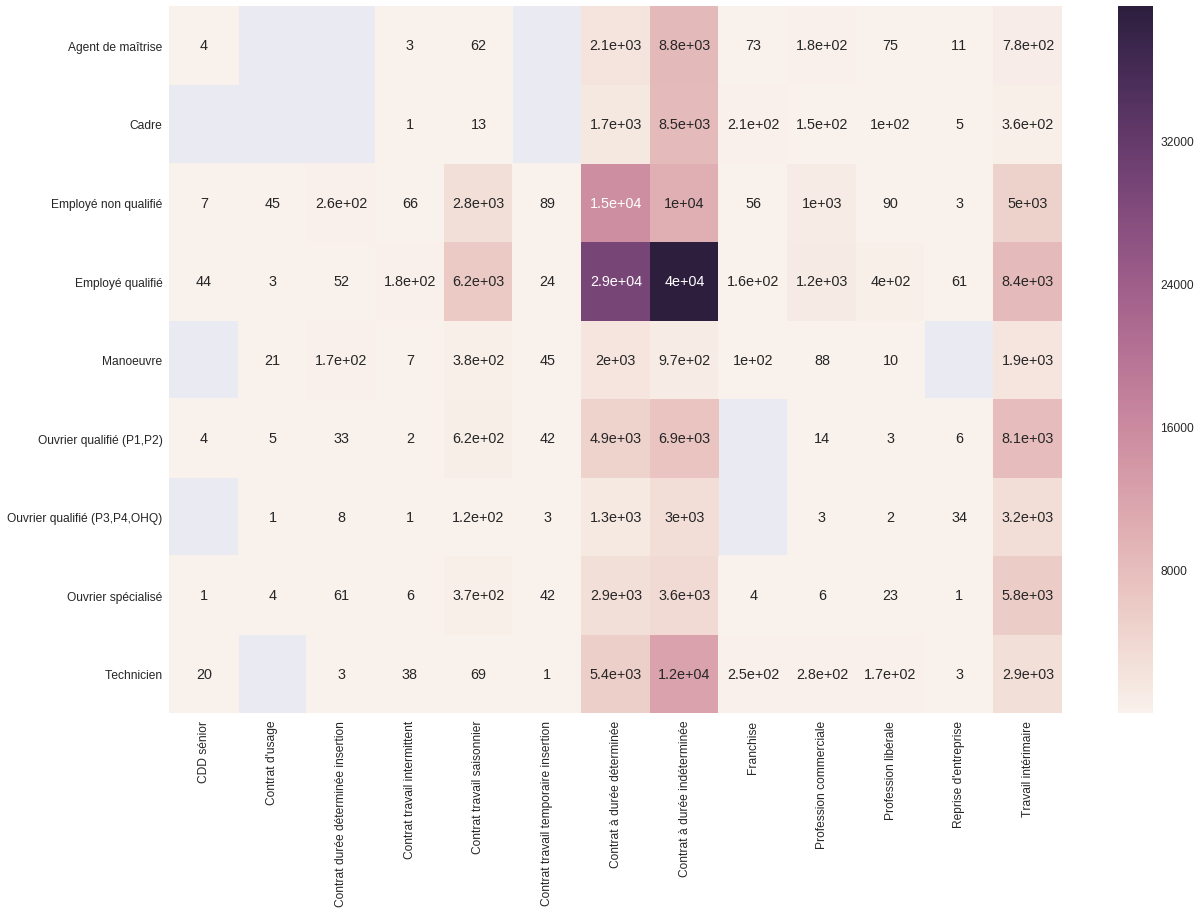

In [24]:
plt.figure(figsize=(20, 13))
sns.set(font_scale=1.2)
sns.heatmap(tmp_res, annot=True)
plt.show()